# Super Store Festive Marketing Campaign Customer Segmentation

Lets prepare for the next marketing campaign (Festive Season Sale)

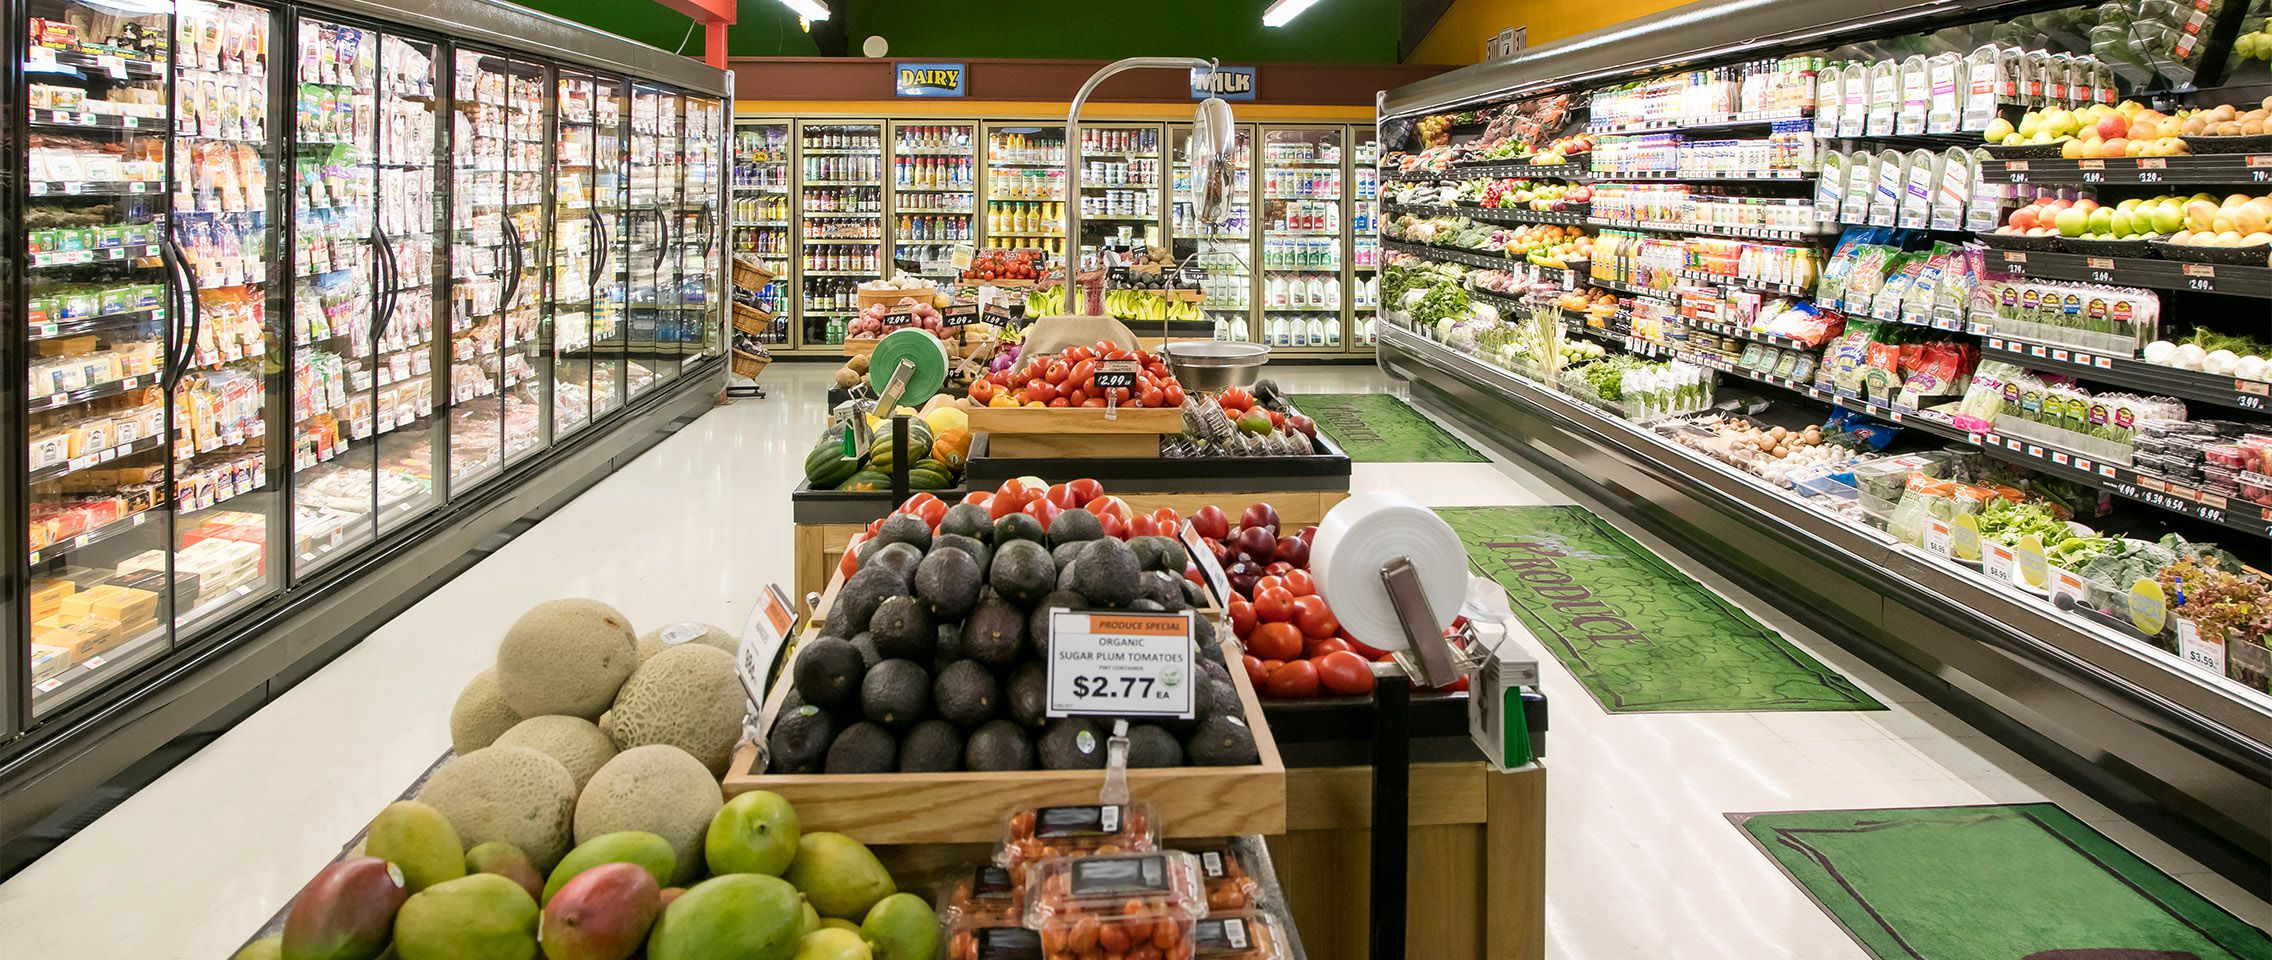
## Project Overview

The "Super Store Festive Marketing Campaign" project aims to plan, execute, and evaluate a comprehensive marketing campaign for a retail store in preparation for the festive season. The goal is to boost sales, increase brand visibility, and engage with both existing and potential customers during this crucial period. This project encompasses market analysis, campaign strategy development, implementation, and performance measurement.

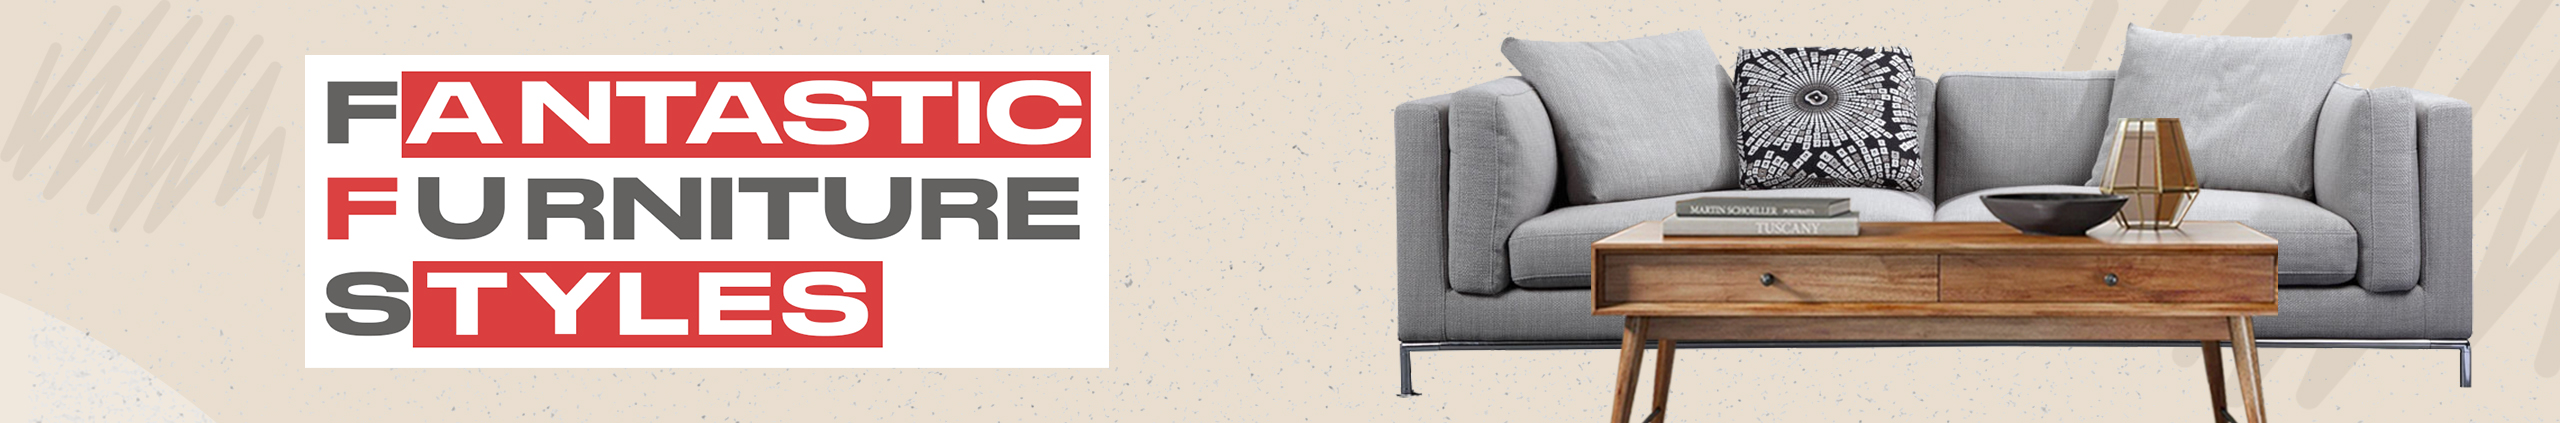
## Business Problem

Festive seasons represent a peak shopping period, and retailers must leverage effective marketing campaigns to capitalize on increased consumer spending. The Retail Super Store recognizes the opportunity to attract customers looking to buy shopping for celebrations and gatherings during this time. The business problem is to design and execute a highly successful festive marketing campaign to boost sales and strengthen the brand's market position.

## Data Understanding

Customer Data: Customer profiles and past purchase history will help in targeting and tailoring marketing efforts

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime
import math

from IPython.core.display import HTML

import matplotlib
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [4]:
#Data Loading
customer = pd.read_csv("marketing_campaign.csv", sep="\t")
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [68]:
multi_table([pd.DataFrame(customer[col].value_counts()) for col in customer.columns])

,count
ID,
5524,1
1183,1
6875,1
5975,1
6246,1
...,...
1277,1
10888,1
2868,1


In [33]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

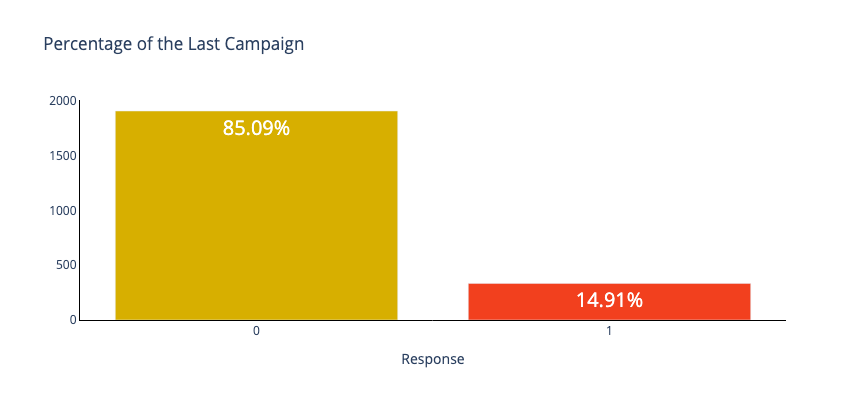

In [34]:
# Create Figure
fig = go.Figure()

# Create Bar Chart
response_count = customer["Response"].value_counts()
response_percentage = (response_count / response_count.sum()) * 100
fig.add_trace(go.Bar(x=[str(x) for x in response_count.index.tolist()],
                     y=response_count.values,
                     marker_color=["#d7af00", "#f2401e"],
                     showlegend=False,
                     text=[f"{percentage:.2f}%" for percentage in response_percentage],
                     textfont_size=20,
                     textfont_color="white"
             )
)

# Update Axes
fig.update_xaxes(showgrid=False, linecolor='black', title_text='Response')
fig.update_yaxes(showgrid=False, linecolor='black')

# Update Layout
fig.update_layout(title_text="Percentage of the Last Campaign",
                  width=600, 
                  height=400,
                  plot_bgcolor='white',
                  showlegend=True,
                  legend={"itemsizing":"constant"}
)

# Show
fig.show()

## Data Cleaning

In [35]:
# Marital Status
customer = customer[~customer["Marital_Status"].isin(["Alone", "Absurd", "YOLO"])]

## Duplicated Data with Different Targets

In [36]:
customer_no_id = customer.drop("ID", axis=1) # same targets
customer_no_id_response = customer.drop(["ID", "Response"], axis=1)

In [37]:
customer_dup1 = customer_no_id[customer_no_id.duplicated(keep = 'last')]
print(customer_dup1.shape)
customer_dup2 = customer_no_id_response[customer_no_id_response.duplicated(keep = 'last')]
print(customer_dup2.shape)
customer_dup_final = customer_dup2.loc[~customer_dup2.index.isin(customer_dup1.index.tolist())] # different targets
print(customer_dup_final.shape)

(182, 28)
(200, 27)
(18, 27)


In [38]:
# Same Data but Different Targets
idx = 0
list_index = []
for index, row in customer_dup_final.iterrows():
    idx += 1
    year_birth = row["Year_Birth"]
    education = row["Education"]
    income = row["Income"]
    data_m = customer[(customer["Year_Birth"]==year_birth)&(customer["Education"]==education)&(customer["Income"]==income)]
    diff_dup = data_m.index.tolist()
    length = len(diff_dup)
    list_index.extend(diff_dup[length-2:length])

In [39]:
print("Before Drop Duplicated Data with Different Targets:", customer.shape)
customer = customer.loc[~customer.index.isin(list_index)]
print(" After Drop Duplicated Data with Different Targets:", customer.shape)

Before Drop Duplicated Data with Different Targets: (2233, 29)
 After Drop Duplicated Data with Different Targets: (2197, 29)


## Duplicated Data with Same Targets

In [40]:
customer_no_id = customer.drop("ID", axis=1) # same targets
customer_dup1 = customer_no_id[customer_no_id.duplicated(keep = 'last')]
print(customer_dup1.shape)

(180, 28)


In [41]:
print("Before Drop Duplicated Data with Different Targets:", customer.shape)
customer_no_id = customer_no_id.drop_duplicates()
customer = customer[customer.index.isin(customer_no_id.index.tolist())]
customer = customer.reset_index(drop=True)
print(" After Drop Duplicated Data with Different Targets:", customer.shape)

Before Drop Duplicated Data with Different Targets: (2197, 29)
 After Drop Duplicated Data with Different Targets: (2017, 29)


## Missing Values

In [42]:
customer["Income"] = customer.groupby("Education")["Income"].transform(lambda x: x.fillna(x.mean()))
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2017 non-null   int64  
 1   Year_Birth           2017 non-null   int64  
 2   Education            2017 non-null   object 
 3   Marital_Status       2017 non-null   object 
 4   Income               2017 non-null   float64
 5   Kidhome              2017 non-null   int64  
 6   Teenhome             2017 non-null   int64  
 7   Dt_Customer          2017 non-null   object 
 8   Recency              2017 non-null   int64  
 9   MntWines             2017 non-null   int64  
 10  MntFruits            2017 non-null   int64  
 11  MntMeatProducts      2017 non-null   int64  
 12  MntFishProducts      2017 non-null   int64  
 13  MntSweetProducts     2017 non-null   int64  
 14  MntGoldProds         2017 non-null   int64  
 15  NumDealsPurchases    2017 non-null   i

In [43]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2017 non-null   int64  
 1   Year_Birth           2017 non-null   int64  
 2   Education            2017 non-null   object 
 3   Marital_Status       2017 non-null   object 
 4   Income               2017 non-null   float64
 5   Kidhome              2017 non-null   int64  
 6   Teenhome             2017 non-null   int64  
 7   Dt_Customer          2017 non-null   object 
 8   Recency              2017 non-null   int64  
 9   MntWines             2017 non-null   int64  
 10  MntFruits            2017 non-null   int64  
 11  MntMeatProducts      2017 non-null   int64  
 12  MntFishProducts      2017 non-null   int64  
 13  MntSweetProducts     2017 non-null   int64  
 14  MntGoldProds         2017 non-null   int64  
 15  NumDealsPurchases    2017 non-null   i

In [50]:
print("Before Feature Engineering:", customer.shape)

# Age
customer["Age"] = 2020 - customer["Year_Birth"]

# Education
customer["Education"] = customer["Education"].replace("2n Cycle", "Master")
customer["Education_Encode"] = customer["Education"].replace(["Basic", "Graduation", "Master", "PhD"], [0, 1, 2, 3])

# Marital Status
marital_status_en = pd.get_dummies(data=customer["Marital_Status"], drop_first=True, prefix="Marital_Status")
customer = pd.concat([customer, marital_status_en], axis=1)

# Children
customer["Children"] = customer["Kidhome"] + customer["Teenhome"]

# Customer Date
customer["Dt_Customer"] = pd.to_datetime(customer["Dt_Customer"], format="%d-%m-%Y")
current_date = pd.to_datetime("27-05-2020", format="%d-%m-%Y")
customer["Dt_Customer_Days"] = (current_date - customer["Dt_Customer"]).dt.days

# MntTotalProducts
customer["TotalMntProducts"] = customer["MntWines"] + customer["MntFruits"] + customer["MntMeatProducts"] + customer["MntFishProducts"] + customer["MntSweetProducts"]

# Product Percentage
customer["WinesPer"] = round((customer["MntWines"] / customer["TotalMntProducts"] * 100), 2)
customer["FruitsPer"] = round((customer["MntFruits"] / customer["TotalMntProducts"] * 100), 2)
customer["MeatPer"] = round((customer["MntMeatProducts"] / customer["TotalMntProducts"] * 100), 2)
customer["FishPer"] = round((customer["MntFishProducts"] / customer["TotalMntProducts"] * 100), 2)
customer["SweetPer"] = round((customer["MntSweetProducts"] / customer["TotalMntProducts"] * 100), 2)

# Types of Product Percentage
customer["GoldPer"] = round((customer["MntGoldProds"] / customer["TotalMntProducts"] * 100), 2)

# Total Channel
customer["TotalChannel"] = customer["NumWebPurchases"] + customer["NumCatalogPurchases"] + customer["NumStorePurchases"]

# Channel Percentage
customer["WebPer"] = round((customer["NumWebPurchases"] / customer["TotalChannel"] * 100), 2)
customer["CatalogPer"] = round((customer["NumCatalogPurchases"] / customer["TotalChannel"] * 100), 2)
customer["StorePer"] = round((customer["NumStorePurchases"] / customer["TotalChannel"] * 100), 2)

# Deals Percentage
customer["DealsPer"] = round((customer["NumDealsPurchases"] / customer["TotalChannel"] * 100), 2)

percentage = ["WebPer", "CatalogPer", "StorePer", "DealsPer"]
customer[percentage] = customer[percentage].fillna(0.0)

# TotalCmp
customer["TotalCmp"] = customer["AcceptedCmp1"] + customer["AcceptedCmp2"] + customer["AcceptedCmp3"] + customer["AcceptedCmp4"] + customer["AcceptedCmp5"]

print(" After Feature Engineering:", customer.shape)

Before Feature Engineering: (2017, 31)
 After Feature Engineering: (2017, 51)


## Customer Segmentation 

In [51]:
# Percentage of Campaign Responses within the Age Range

customer["Age"] = 2020 - customer["Year_Birth"]

df_age = pd.DataFrame()
list_age = [24, 30, 35, 40, 45, 50, 55, 60, 65, 70]
for i in range(len(list_age)):
    if(i==len(list_age)-1):
        feature_format = "{}+".format(list_age[i])
        df_age.loc["Response 0", feature_format] = int(customer[(customer["Age"]>=list_age[i])&(customer["Response"]==0)].shape[0])
        df_age.loc["Response 1", feature_format] = int(customer[(customer["Age"]>=list_age[i])&(customer["Response"]==1)].shape[0])
    else:
        feature_format = "{}-{}".format(list_age[i], list_age[i+1])
        df_age.loc["Response 0", feature_format] = int(customer[(customer["Age"]>=list_age[i])&(customer["Age"]<list_age[i+1])&(customer["Response"]==0)].shape[0])
        df_age.loc["Response 1", feature_format] = int(customer[(customer["Age"]>=list_age[i])&(customer["Age"]<list_age[i+1])&(customer["Response"]==1)].shape[0])
    
    df_age.loc["Total", feature_format] = df_age.loc["Response 0", feature_format] + df_age.loc["Response 1", feature_format]
    df_age.loc["Response_0_Percentage", feature_format] = (df_age.loc["Response 0", feature_format]/df_age.loc["Total", feature_format])*100
    df_age.loc["Response_1_Percentage", feature_format] = (df_age.loc["Response 1", feature_format]/df_age.loc["Total", feature_format])*100

df_age = df_age.T.reset_index()
df_age = df_age.rename(columns={"index": "Age"})
df_age

,Age,Response 0,Response 1,Total,Response_0_Percentage,Response_1_Percentage
0,24-30,28.0,8.0,36.0,77.777778,22.222222
1,30-35,108.0,20.0,128.0,84.375000,15.625000
2,35-40,138.0,40.0,178.0,77.528090,22.471910
3,40-45,255.0,28.0,283.0,90.106007,9.893993
4,45-50,301.0,48.0,349.0,86.246418,13.753582
5,50-55,226.0,42.0,268.0,84.328358,15.671642
6,55-60,186.0,27.0,213.0,87.323944,12.676056
7,60-65,202.0,28.0,230.0,87.826087,12.173913
8,65-70,183.0,26.0,209.0,87.559809,12.440191
9,70+,98.0,25.0,123.0,79.674797,20.325203


## Percentage of Campaign Responses by Income and Education

In [52]:
def binning(row):
    list_income = [0, 15000, 30000, 45000, 60000, 75000]
    for i in range(len(list_income)-1):
        if((row["Income"]>=list_income[i])&(row["Income"]<list_income[i+1])):
            return "{}-{}".format(list_income[i], list_income[i+1])
    return "{}+".format(list_income[-1]) 

customer["Income_Group"] = customer.apply(lambda x: binning(x), axis=1)
df_income_edu = customer.groupby(["Income_Group", "Education"]).agg({"ID" : "count", "Response" : "sum"}).reset_index()

df_income_edu = df_income_edu.sort_values(by=["Income_Group", "Education"]).reset_index(drop=True)
df_income_edu = df_income_edu.rename(columns={"ID": "Total", "Response": "Response_1"})
df_income_edu["Response_1_Percentage"] = round((df_income_edu["Response_1"] / df_income_edu["Total"]) * 100, 2)
df_income_edu

,Income_Group,Education,Total,Response_1,Response_1_Percentage
0,0-15000,Basic,11,1,9.09
1,0-15000,Graduation,20,1,5.00
2,0-15000,Master,15,3,20.00
3,0-15000,PhD,5,0,0.00
4,15000-30000,Basic,36,1,2.78
5,15000-30000,Graduation,151,18,11.92
6,15000-30000,Master,71,9,12.68
7,15000-30000,PhD,26,3,11.54
8,30000-45000,Basic,2,0,0.00
9,30000-45000,Graduation,234,23,9.83


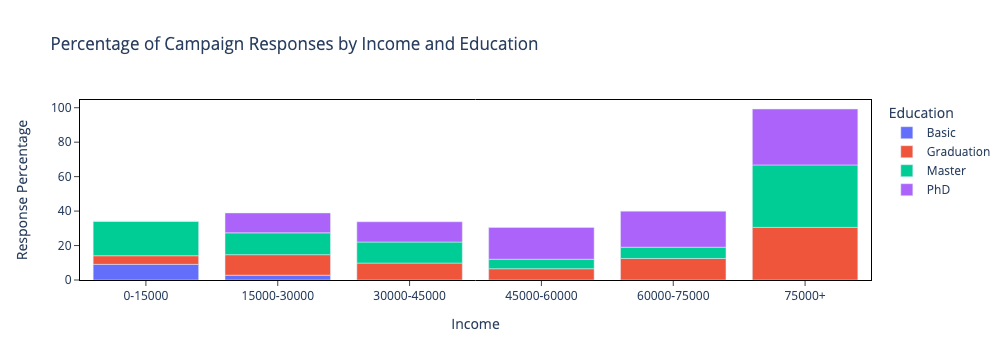

In [53]:
# Create a bar graph
fig = px.bar(
    df_income_edu, 
    x="Income_Group", 
    y="Response_1_Percentage",
    color="Education",
    title="Percentage of Campaign Responses by Income and Education",
    labels={"Income_Group": "Income", "Response_1_Percentage": "Response Percentage"}
)

# Customize the layout
fig.update_layout(
    xaxis_title="Income",
    yaxis_title="Response Percentage",
    xaxis=dict(showgrid=True, linecolor='black', mirror=True, ticks='outside'),
    yaxis=dict(showgrid=True, linecolor='black', mirror=True, ticks='outside'),
    plot_bgcolor='white',
)

# Show the bar graph
fig.show()

## Percentage of Campaign Responses by Products

In [54]:
def binning_percentage(row, string):
    percentage = [0, 25, 50, 75, 100]
    for i in range(len(percentage)-1):
        if((row[string]>=percentage[i])&(row[string]<=percentage[i+1])):
            return "{}%-{}%".format(percentage[i], percentage[i+1])

In [55]:
df_product_percentage = pd.DataFrame()
products = ["FishPer", "FruitsPer", "SweetPer", "WinesPer", "MeatPer"]
percentage = [0, 25, 50, 75, 100]
for i in range(len(percentage)-1):
    feature_format = "{}%-{}%".format(percentage[i], percentage[i+1])
    for product in products:
        total = customer[(customer[product]>=percentage[i])&(customer[product]<=percentage[i+1])].shape[0]
        response_1 = customer[(customer[product]>=percentage[i])&(customer[product]<=percentage[i+1])&(customer["Response"]==1)].shape[0]
        
        df_product_percentage.loc[product[:-3], feature_format] = round((response_1/total) * 100, 2)
    
df_product_percentage = df_product_percentage.stack().reset_index()
df_product_percentage.columns = ["Products", "Percentage", "Response_1_Percentage"]
df_product_percentage

,Products,Percentage,Response_1_Percentage
0,Fish,0%-25%,15.06
1,Fish,25%-50%,6.09
2,Fish,50%-75%,0.00
3,Fish,75%-100%,0.00
4,Fruits,0%-25%,14.39
5,Fruits,25%-50%,16.92
6,Fruits,50%-75%,0.00
7,Fruits,75%-100%,0.00
8,Sweet,0%-25%,14.45
9,Sweet,25%-50%,15.15


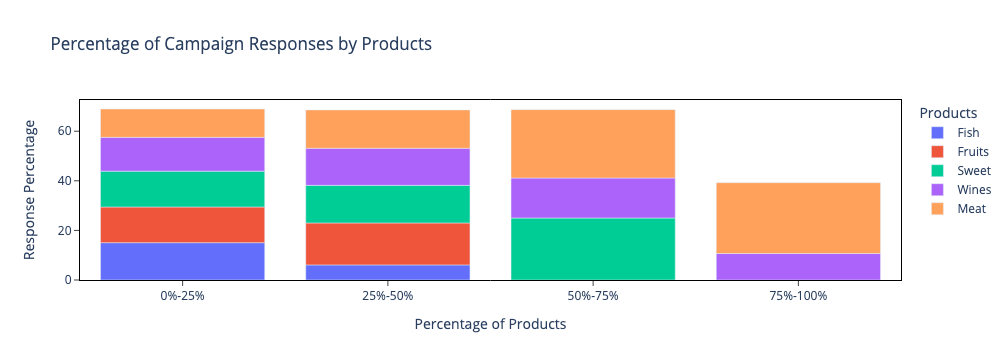

In [56]:
# Create a bar graph
fig = px.bar(
    df_product_percentage, 
    x="Percentage", 
    y="Response_1_Percentage",
    color="Products",
    title="Percentage of Campaign Responses by Products",
    labels={"Percentage": "Percentage of Products", "Response_1_Percentage": "Response Percentage"}
)

# Customize the layout
fig.update_layout(
    xaxis_title="Percentage of Products",
    yaxis_title="Response Percentage",
    xaxis=dict(showgrid=True, linecolor='black', mirror=True, ticks='outside'),
    yaxis=dict(showgrid=True, linecolor='black', mirror=True, ticks='outside'),
    plot_bgcolor='white',
)

# Show the bar graph
fig.show()

## Percentage of Campaign Responses within the Range of Gold Products

In [57]:
df_gold_percentage = pd.DataFrame()
percentage = [0, 25, 50, 75, 100]
for i in range(len(percentage)-1):
    feature_format = "{}%-{}%".format(percentage[i], percentage[i+1])
    total = customer[(customer["GoldPer"]>=percentage[i])&(customer["GoldPer"]<=percentage[i+1])].shape[0]
    response_1 = customer[(customer["GoldPer"]>=percentage[i])&(customer["GoldPer"]<=percentage[i+1])&(customer["Response"]==1)].shape[0]
    
    df_gold_percentage.loc["Gold Percentage", feature_format] = round((response_1/total) * 100, 2)

df_gold_percentage = df_gold_percentage.T
df_gold_percentage

,Gold Percentage
0%-25%,14.45
25%-50%,10.58
50%-75%,21.74
75%-100%,31.03


## Percentage of Campaign Responses by Channels(SM Accounts)

In [58]:
df_channel_percentage = pd.DataFrame()
channels = ["WebPer", "CatalogPer", "StorePer"]
percentage = [0, 25, 50, 75, 100]
for i in range(len(percentage)-1):
    feature_format = "{}%-{}%".format(percentage[i], percentage[i+1])
    for channel in channels:
        total = customer[(customer[channel]>=percentage[i])&(customer[channel]<=percentage[i+1])].shape[0]
        response_1 = customer[(customer[channel]>=percentage[i])&(customer[channel]<=percentage[i+1])&(customer["Response"]==1)].shape[0]
        
        if(total==0):
            df_channel_percentage.loc[channel[:-3], feature_format] = 0.00
        else:
            df_channel_percentage.loc[channel[:-3], feature_format] = round((response_1/total) * 100, 2)
    
df_channel_percentage = df_channel_percentage.stack().reset_index()
df_channel_percentage.columns = ["Channels", "Percentage", "Response_1_Percentage"]

df_channel_percentage

,Channels,Percentage,Response_1_Percentage
0,Web,0%-25%,11.90
1,Web,25%-50%,14.11
2,Web,50%-75%,20.54
3,Web,75%-100%,0.00
4,Catalog,0%-25%,10.36
5,Catalog,25%-50%,26.87
6,Catalog,50%-75%,36.36
7,Catalog,75%-100%,0.00
8,Store,0%-25%,34.15
9,Store,25%-50%,20.89


## Conclusions
The "Super Store Festive Marketing Campaign" project concludes with several key takeaways and recommendations based on the analysis and results of the campaign. Here are the main conclusions drawn from the project:

<b>Successful Sales Boost:</b> If the campaign is successful in achieving a significant increase in sales revenue during the festive season compared to previous years. This outcome demonstrates the campaign's effectiveness in driving customer purchases.

<b>Positive Return on Investment (ROI):</b> The campaign should yielded a positive ROI, to indicate that the resources invested in marketing efforts generates a profitable return. This highlights the campaign's cost-effectiveness.

<b>Lessons Learned:</b> The project identified several lessons learned and best practices that can be applied to future marketing campaigns. These insights include effective content strategies, optimal timing, and customer segmentation tactics.

## Next Steps
<b>Data Analysis Continuation:</b> Continue to analyze campaign data to gain deeper insights into customer behavior, preferences, and trends. Explore advanced data analytics techniques, such as predictive analytics, to anticipate customer needs and behavior in future campaigns.

<b>Customer Segmentation Refinement:</b> Refine and expand customer segmentation strategies based on the insights gained from the campaign. Consider using more advanced segmentation methods to tailor marketing messages even further.

<b>Marketing Channel Optimization:</b> Optimize marketing channel allocation based on the performance data collected during the campaign. Allocate resources to the channels that generated the highest ROI. Consider testing new marketing channels that align with evolving consumer preferences and behavior.

<b>Continuous Testing and Experimentation:</b> Implement an ongoing process of A/B testing and experimentation to refine marketing strategies, content, and messaging. Test new creative elements, promotional tactics, and campaign timing to identify what resonates best with customers.

<b>Budget and Resource Allocation:</b> Evaluate the allocation of budget and resources for future marketing campaigns. Ensure that resources are allocated to the most effective strategies and channels. Consider adjusting budgets to align with seasonal variations in customer demand.